In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

In [36]:
#Reading ht csv file
df =pd.read_csv("C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\Data_Analytics\Analytics.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,0.816895,0,1,1,2,1,0.928786,0.631290,1,1
1,51676,0,0.743652,0,0,1,3,0,0.787090,0.427261,2,1
2,31112,1,0.975586,0,1,1,2,0,0.271835,0.532876,2,1
3,60182,0,0.597168,0,0,1,2,1,0.621313,0.578483,3,1
4,1665,0,0.963379,1,0,1,3,0,0.636778,0.328847,2,1


# Selecting Important Features

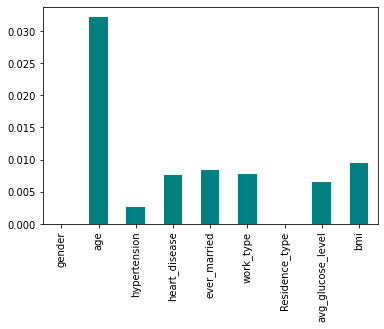

In [37]:
from sklearn.feature_selection import mutual_info_classif

X=df.iloc[:,1:len(df.columns)-2]
y=df['stroke']

importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-2])
feat_imp.plot(kind='bar',color='teal')
plt.show()

# DECISION TREE CLASSIFICATION

In [38]:
X_dt = df.drop(['id','gender','ever_married','Residence_type','stroke'],axis=1)

Y_dt = df['stroke']


# TRAIN TEST SPLIT

In [39]:
#Splitting the data into training and testing sets and validation 
from sklearn.model_selection import train_test_split

x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.2,random_state=0)
x_train_dt, x_val_dt, y_train_dt, y_val_dt = train_test_split(x_train_dt, y_train_dt, test_size=0.25,random_state=0)

In [40]:
print(x_train_dt)

           age  hypertension  heart_disease  work_type  avg_glucose_level  \
921   0.194336             0              0          4           0.288423   
676   0.316406             0              0          2           0.327807   
4735  0.218750             0              0          2           0.322884   
5052  0.072266             0              0          4           0.192264   
3465  0.340820             0              0          2           0.460406   
...        ...           ...            ...        ...                ...   
549   0.938965             0              0          2           0.742248   
1383  0.291992             0              0          2           0.184933   
3111  0.707031             0              0          0           0.565876   
1335  0.914551             0              0          3           0.105256   
293   0.816895             0              0          2           0.725499   

           bmi  smoking_status  
921   0.228033               0  
676   0.2

In [41]:
print(y_train_dt)

921     0
676     0
4735    0
5052    0
3465    0
       ..
549     0
1383    0
3111    0
1335    0
293     0
Name: stroke, Length: 3066, dtype: int64


# VALIDATION DATA

In [42]:
print('TRAIN SHAPE: ',x_train_dt.shape)
print('VALIDATION SHAPE: ',x_val_dt.shape)
print('TESTING SHAPE: ',x_test_dt.shape)

TRAIN SHAPE:  (3066, 7)
VALIDATION SHAPE:  (1022, 7)
TESTING SHAPE:  (1022, 7)


# TRAINING

In [43]:
from sklearn.tree import DecisionTreeClassifier  
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0)  
DT_model.fit(x_train_dt, y_train_dt)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

# TESTING

In [44]:
#Predicting the test set result  
y_pred_dt= DT_model.predict(x_test_dt)
print("SHAPE OF PREDICTED: ",y_pred_dt.shape)

SHAPE OF PREDICTED:  (1022,)


In [45]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_dt, y_pred=DT_model.predict(x_train_dt)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test_dt, y_pred=y_pred_dt))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9197651663405088


# CREATING CONFUSION MATRIX

In [46]:
from sklearn.metrics import confusion_matrix,f1_score  
cmatrix = confusion_matrix(y_test_dt,y_pred_dt)
print(cmatrix)

[[929  39]
 [ 43  11]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dt,y_pred_dt,target_names = ['No stroke','Stroke']))

              precision    recall  f1-score   support

   No stroke       0.96      0.96      0.96       968
      Stroke       0.22      0.20      0.21        54

    accuracy                           0.92      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.92      0.92      0.92      1022



# Hyperparameters Tuning

In [48]:
#We will consider gini(how good the split) and entropy(removing impurity)
#The less the max depth the btter or it leads to overfitting
param_list = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None],
    "min_samples_split":[10,7,2,30,80,22],
}

In [49]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DT_model, param_grid=param_list, cv=10)

In [50]:
grid.fit(x_train_dt, y_train_dt)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_split': [10, 7, 2, 30, 80, 22]})

In [51]:
#Best score obtained from hyperparameter tuning
print('Best Score: ',grid.best_score_)
print('Best parameter: ',grid.best_params_['criterion'])
print('Best max_depth: ',grid.best_params_['max_depth'])
print('Best min_samples_split: ',grid.best_params_['min_samples_split'])

Best Score:  0.9520565881075557
Best parameter:  gini
Best max_depth:  1
Best min_samples_split:  10


# TUNINNG THE MODEL

In [52]:
#WE USED THE BEST PARAMETERS WE GOT IN THE HYPERPARAMETERS TUNING
DT_tunned_model = DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=10, random_state=0)  
DT_tunned_model.fit(x_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=1, min_samples_split=10, random_state=0)

In [53]:
pred_dt= DT_tunned_model.predict(x_test_dt)

In [54]:
con_matrix = confusion_matrix(y_test_dt,pred_dt)
print(con_matrix)

print(classification_report(y_test_dt,y_pred_dt,target_names = ['No stroke','Stroke']))

[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

   No stroke       0.96      0.96      0.96       968
      Stroke       0.22      0.20      0.21        54

    accuracy                           0.92      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.92      0.92      0.92      1022



In [55]:
from sklearn.metrics import accuracy_score 
score1 = accuracy_score(y_val_dt,y_pred_dt)
print(score1)

0.9099804305283757


# PICKLE FILE CREATION

In [56]:
import pickle

with open('tuned_model.pkl','wb') as files:
    pickle.dump(DT_tunned_model,files)

# PREDICT VALUES USING PICKLE

In [57]:
pickled_model = pickle.load(open('tuned_model.pkl','rb'))
predict = pickled_model.predict(x_val_dt)

In [58]:
score = pickled_model.score(x_test_dt,y_test_dt)
print(score)

0.9471624266144814


In [59]:
from sklearn.metrics import accuracy_score,f1_score
score1 = accuracy_score(y_test_dt,y_pred_dt)
score2 = f1_score(y_test_dt,y_pred_dt)
print("Accuracy: ",score1)
print("F1_score: ",score2)

Accuracy:  0.9197651663405088
F1_score:  0.21153846153846154


# VALIDATION SET ALONG WITH PREDICTED VALUES


In [60]:
df_final = pd.DataFrame({'y_val':y_val_dt,'y_pred': predict})
df_final.head()

df_final.to_csv("validate.csv",index=False)